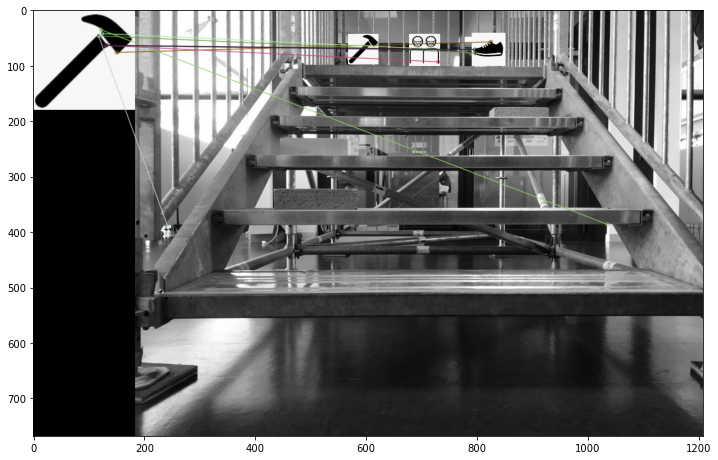

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    
treppe = cv2.imread('DATA/Treppe_mitPiktogramm.png', 0);
hammer = cv2.imread('DATA/Hammer.png', 0)
maske = cv2.imread('DATA/Maske.png', 0)
schuh = cv2.imread('DATA/Schuh.png')

#ORB-Detektoren mittels BruteForce
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(hammer, None) #kp = keypoint / des = Deskriptor / None = keine Maske
kp2, des2 = orb.detectAndCompute(treppe, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
single_match = matches[0]
matches = sorted(matches, key = lambda x: x.distance)
found_matches = cv2.drawMatches(hammer, kp1, treppe, kp2, matches[:25], None,flags=2)
display(found_matches)
